In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Neural Network

In [73]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8,1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

Random Numbers

In [106]:


# Set seed for reproducibility
np.random.seed(42)

# Define parameters for Class 1
mean_class1 = [3, 5]
std_class1 = 1

# Define parameters for Class 2
mean_class2 = [6, 6]
std_class2 = 1

# Generate data for Class 1
class1_data = np.random.normal(loc=mean_class1, scale=std_class1, size=(500, 2))

# Generate data for Class 2
class2_data = np.random.normal(loc=mean_class2, scale=std_class2, size=(500, 2))

# Create labels
labels_class1 = np.zeros((500, 1))  # Class 1 labels (0)
labels_class2 = np.ones((500, 1))   # Class 2 labels (1))

# Combine data and labels
data_class1 = np.hstack((class1_data, labels_class1))
data_class2 = np.hstack((class2_data, labels_class2))

# Combine both classes into one dataset
dataset = np.vstack((data_class1, data_class2))



# Visualize Data

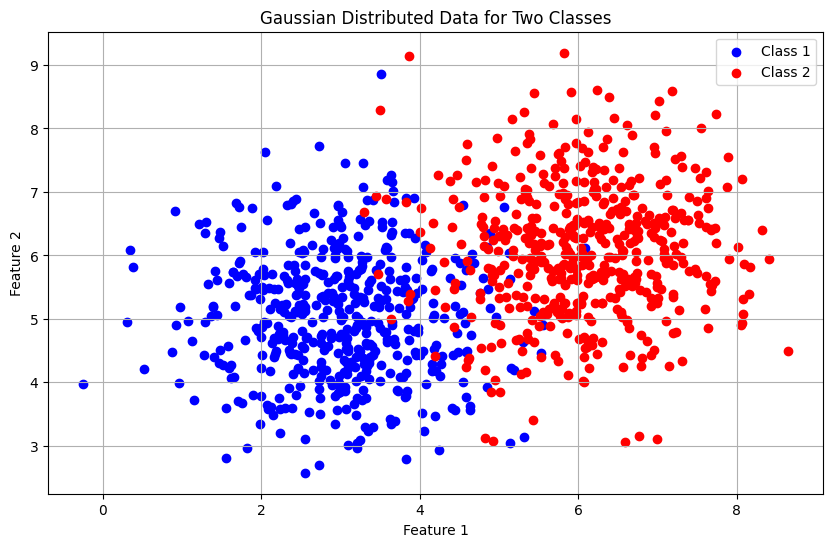

In [107]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], c='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], c='red', label='Class 2')
plt.title('Gaussian Distributed Data for Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
X = dataset[:, :2]
y = dataset[:, 2]

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(y_test.shape)

(200,)


Train,Test value

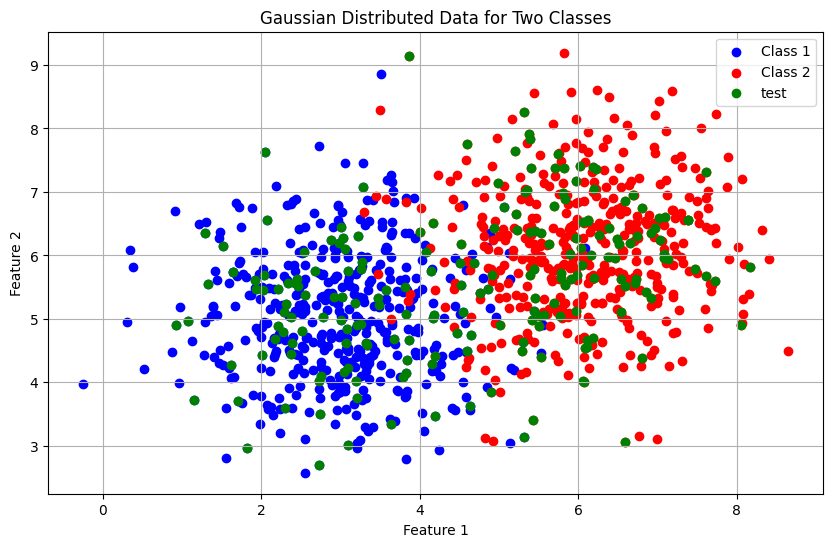

In [78]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], c='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], c='red', label='Class 2')
plt.scatter(X_test[:, 0], X_test[:, 1], c='green', label='test')
plt.title('Gaussian Distributed Data for Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
#standardize input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
#convert to tensor
X_train=torch.tensor(X_train,dtype=torch.float32)
print(X_train.shape)
X_test=torch.tensor(X_test,dtype=torch.float32)
print(X_test.shape)
y_train=torch.tensor(y_train,dtype=torch.float32).unsqueeze(1)
print(y_train.shape)
y_test=torch.tensor(y_test,dtype=torch.float32).unsqueeze(1)
print(y_test.shape)

torch.Size([800, 2])
torch.Size([200, 2])
torch.Size([800, 1])
torch.Size([200, 1])


In [81]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


# Train Model

In [ ]:
# Instantiate the model, define the loss function and the optimizer
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 100
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        # print(inputs.shape)
        # print(labels.shape)
        optimizer.zero_grad()
        # inputs=inputs.squeeze()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_loader))


    # if (epoch) % 10 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

Epoch [1/100], Train Loss: 0.3748, Test Loss: 0.1867
Epoch [2/100], Train Loss: 0.1446, Test Loss: 0.1853
Epoch [3/100], Train Loss: 0.1358, Test Loss: 0.1530
Epoch [4/100], Train Loss: 0.1337, Test Loss: 0.1727
Epoch [5/100], Train Loss: 0.1330, Test Loss: 0.1519
Epoch [6/100], Train Loss: 0.1329, Test Loss: 0.1489
Epoch [7/100], Train Loss: 0.1333, Test Loss: 0.1531
Epoch [8/100], Train Loss: 0.1302, Test Loss: 0.1549
Epoch [9/100], Train Loss: 0.1322, Test Loss: 0.1535
Epoch [10/100], Train Loss: 0.1317, Test Loss: 0.1580
Epoch [11/100], Train Loss: 0.1350, Test Loss: 0.1718
Epoch [12/100], Train Loss: 0.1294, Test Loss: 0.1469
Epoch [13/100], Train Loss: 0.1375, Test Loss: 0.1736
Epoch [14/100], Train Loss: 0.1310, Test Loss: 0.1484
Epoch [15/100], Train Loss: 0.1311, Test Loss: 0.1722
Epoch [16/100], Train Loss: 0.1349, Test Loss: 0.1420
Epoch [17/100], Train Loss: 0.1295, Test Loss: 0.1444
Epoch [18/100], Train Loss: 0.1306, Test Loss: 0.1613
Epoch [19/100], Train Loss: 0.1259, T

# Plot Loss

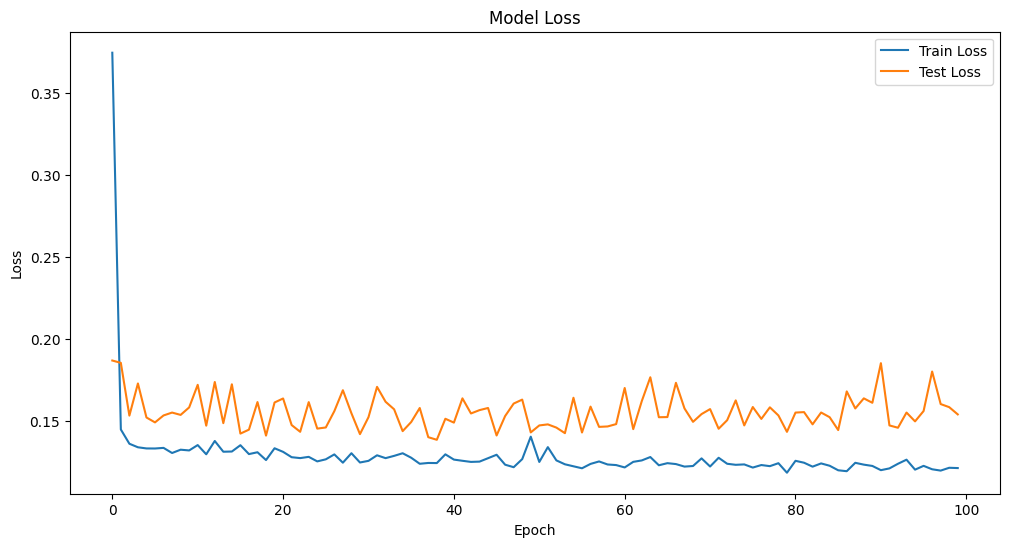

In [109]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Accuracy

In [115]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.85).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #print((predicted == labels).sum().item())
    accuracy = correct / total
    print(f'Test Accuracy for Threshold = 0.5: {accuracy:.7f}')

Test Accuracy: 0.9100000


#  Precision

In [116]:
model.eval()
with torch.no_grad():
  percisions_class_1 = 0
  percisions_class_2 = 0
  macro_precisions=0
  for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.85).float()
        precision_class_1 = precision_score(labels,predicted,average='binary', pos_label=0)
        precision_class_2 = precision_score(labels,predicted,average='binary', pos_label=1)
        macro_precision = precision_score(labels, predicted, average='macro')
        # print(percisions_class_1)
        percisions_class_1 += precision_class_1
        percisions_class_2 += precision_class_2

        macro_precisions += macro_precision
  percisions_class_1 = percisions_class_1 / len(test_loader)
  percisions_class_2 = percisions_class_2 / len(test_loader)

  macro_precisions = macro_precisions / len(test_loader)

  print(f'percisions_class_1:{percisions_class_1:.10f}')
  print(f'percisions_class_2:{percisions_class_2:.10f}')

  print(f'macro_precision:{macro_precisions:.10f}')









percisions_class_1:0.8553973804
percisions_class_2:0.9694749695
macro_precision:0.9124361749


# Recall

In [117]:
model.eval()
with torch.no_grad():
  recalls_class_1 = 0
  recalls_class_2 = 0
  macro_recalls = 0
  for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.85).float()
        recall_class_1 = recall_score(labels, predicted, labels=[0,1], average='binary',pos_label=0)
        recall_class_2 = recall_score(labels, predicted, labels=[0,1], average='binary',pos_label=1)
        macro_recall = recall_score(labels, predicted, labels=[0,1], average='macro')
        # print(recall)
        recalls_class_1 += recall_class_1
        recalls_class_2 += recall_class_2
        macro_recalls += macro_recall
  recalls_class_1 = recalls_class_1 / len(test_loader)
  recalls_class_2 = recalls_class_2 / len(test_loader)
  macro_recalls = macro_recalls / len(test_loader)
  print(f'Recall_class_1:{recalls_class_1:.10f}')
  print(f'Recall_class_1:{recalls_class_2:.10f}')
  print(f'macro_recalls:{macro_recalls:.10f}')






Recall_class_1:0.9719169719
Recall_class_1:0.8682578106
macro_recalls:0.9200873912


# F score

In [118]:
fscore=(2*macro_precisions*macro_recalls)/(macro_precisions+macro_recalls)
print(f'F score:{fscore:.10f}')

F score:0.9162458103
